In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston

In [2]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [3]:
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


# Univariate Outlier Detection

## Mean Absolute Deviation

In [6]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()

df_scaled = stdScaler.fit_transform(df)

In [7]:
df_normalized = pd.DataFrame(df_scaled, columns=boston.feature_names)
df_normalized.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.417713,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.415269,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.415272,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.414680,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.410409,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [8]:
outlier_rows, outlier_cols = np.where(abs(df_normalized>3))

print(list(zip(outlier_rows,outlier_cols)))

[(55, 1), (56, 1), (57, 1), (141, 12), (142, 3), (152, 3), (154, 3), (155, 3), (160, 3), (162, 3), (163, 3), (199, 1), (200, 1), (201, 1), (202, 1), (203, 1), (204, 1), (208, 3), (209, 3), (210, 3), (211, 3), (212, 3), (216, 3), (218, 3), (219, 3), (220, 3), (221, 3), (222, 3), (225, 5), (234, 3), (236, 3), (256, 1), (257, 5), (262, 5), (269, 3), (273, 3), (274, 3), (276, 3), (277, 3), (282, 3), (283, 1), (283, 3), (284, 1), (347, 1), (351, 7), (352, 7), (353, 1), (353, 7), (354, 7), (355, 7), (356, 3), (357, 3), (358, 3), (363, 3), (364, 3), (364, 5), (369, 3), (370, 3), (372, 3), (373, 12), (374, 12), (380, 0), (398, 0), (404, 0), (405, 0), (410, 0), (412, 12), (414, 0), (414, 12), (418, 0), (427, 0)]


In [9]:
outlier_rows

array([ 55,  56,  57, 141, 142, 152, 154, 155, 160, 162, 163, 199, 200,
       201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219, 220,
       221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276, 277,
       282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356, 357,
       358, 363, 364, 364, 369, 370, 372, 373, 374, 380, 398, 404, 405,
       410, 412, 414, 414, 418, 427], dtype=int64)

In [10]:
df.iloc[outlier_rows]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
55,0.01311,90.0,1.22,0.0,0.4030,7.249,21.9,8.6966,5.0,226.0,17.9,395.93,4.81
56,0.02055,85.0,0.74,0.0,0.4100,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77
57,0.01432,100.0,1.32,0.0,0.4110,6.816,40.5,8.3248,5.0,256.0,15.1,392.90,3.95
141,1.62864,0.0,21.89,0.0,0.6240,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41
142,3.32105,0.0,19.58,1.0,0.8710,5.403,100.0,1.3216,5.0,403.0,14.7,396.90,26.82
152,1.12658,0.0,19.58,1.0,0.8710,5.012,88.0,1.6102,5.0,403.0,14.7,343.28,12.12
154,1.41385,0.0,19.58,1.0,0.8710,6.129,96.0,1.7494,5.0,403.0,14.7,321.02,15.12
155,3.53501,0.0,19.58,1.0,0.8710,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02
160,1.27346,0.0,19.58,1.0,0.6050,6.250,92.6,1.7984,5.0,403.0,14.7,338.92,5.50
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92


## Quantile

In [20]:
def outlier_detection_percentile(x):    
    
    q1 = np.percentile(x, 25)        
    q3 = np.percentile(x, 75)
        
    quantile_range = q3 - q1   
    
    floor  = q1 - 1.5*quantile_range        
    ceil  = q3 + 1.5*quantile_range    
    
    outliers_index = x[(x < floor) | (x > ceil)].index
    
    outliers = x[outliers_index]
    
    print('\n')
    print("Total number of outliers: ",len(outliers))
    print('\n')
    
    print('********************************* List of outliers ************************************')
    print(outliers.tolist())
    
    

In [21]:
outlier_detection_percentile(df.RM)



Total number of outliers:  30


********************************* List of outliers ************************************
[8.069, 7.82, 7.802, 8.375, 7.929, 7.765, 7.831, 7.875, 7.853, 8.034, 8.266, 8.725, 8.04, 8.337, 8.247, 8.259, 8.704, 8.398, 8.297, 7.82, 7.923, 8.78, 3.561, 3.863, 4.138, 4.368, 4.652, 4.138, 4.628, 4.519]


## Double MAD from Median

In [22]:
def doubleMADsfromMedian(y,thresh=3.5):
    # warning: this function does not check for NAs
    # nor does it address issues when 
    # more than 50% of your data have identical values
    m = np.median(y)
    
    abs_dev = np.abs(y - m)
    
    left_mad = np.median(abs_dev[y <= m])
    right_mad = np.median(abs_dev[y >= m])
    y_mad = left_mad * np.ones(len(y))
    
    y_mad[y > m] = right_mad
    
    modified_z_score = 0.6745 * abs_dev / y_mad
    modified_z_score[y == m] = 0
    
    return y[modified_z_score > thresh]
    

In [23]:
doubleMADsfromMedian(df.RM)

163    8.375
225    8.725
257    8.704
262    8.398
364    8.780
365    3.561
367    3.863
374    4.138
384    4.368
406    4.138
414    4.519
Name: RM, dtype: float64

## Median Absolute Deviation

In [45]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return points[(modified_z_score > thresh)]

In [46]:
is_outlier(df.RM)

array([[ 8.069],
       [ 8.375],
       [ 8.034],
       [ 8.266],
       [ 8.725],
       [ 8.04 ],
       [ 8.337],
       [ 8.247],
       [ 8.259],
       [ 8.704],
       [ 8.398],
       [ 8.297],
       [ 8.78 ],
       [ 3.561],
       [ 3.863],
       [ 4.138],
       [ 4.368],
       [ 4.138]])

# Multivariate Outlier Detection

## EllipticEnvelope

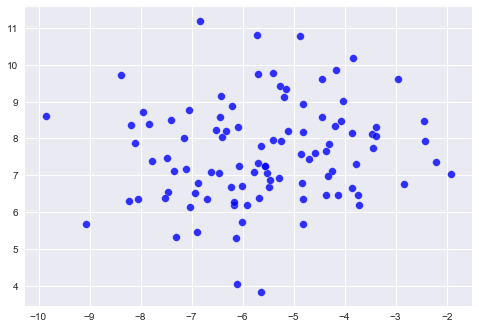

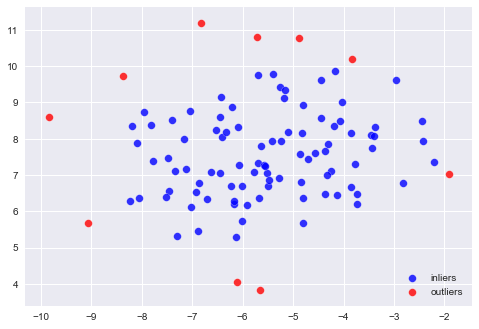

In [11]:
#Create an artificial distribution made of blobs
from sklearn.datasets import make_blobs
blobs = 1
blob = make_blobs(n_samples=100, n_features=2, centers=blobs,
cluster_std=1.5, shuffle=True, random_state=5)

# Robust Covariance Estimate
from sklearn.covariance import EllipticEnvelope
robust_covariance_est = EllipticEnvelope(contamination=.1).fit(blob[0])
detection = robust_covariance_est.predict(blob[0])
outliers = np.where(detection==-1)[0]
inliers = np.where(detection==1)[0]


# Draw the distribution and the detected outliers
from matplotlib import pyplot as plt
# Just the distribution
plt.scatter(blob[0][:,0],blob[0][:,1], c='blue', alpha=0.8,
s=60, marker='o', edgecolors='white')
plt.show()

# The distribution and the outliers
in_points = plt.scatter(blob[0][inliers,0],blob[0][inliers,1],
c='blue', alpha=0.8, s=60, marker='o', edgecolors='white')
out_points = plt.scatter(blob[0][outliers,0],blob[0][outliers,1],
c='red', alpha=0.8, s=60, marker='o', edgecolors='white')
plt.legend((in_points,out_points),('inliers','outliers'),
scatterpoints=1, loc='lower right')
plt.show()

In [12]:
from sklearn.decomposition import PCA
pca = PCA(2)
principal_components = pca.fit_transform(df_normalized)


In [13]:
pca.explained_variance_ratio_.cumsum()

array([ 0.47097344,  0.58113216])

In [15]:
robust_covariance_est = EllipticEnvelope(store_precision=False,
                                         assume_centered = False, contamination=.05)

robust_covariance_est.fit(df_normalized)
detection = robust_covariance_est.predict(df_normalized)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-23.066934320375950 > -95.172231495166130)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-22.589382264489437 > -94.224022479674375)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-22.890149151240891 > -94.845163708881557)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-23.158044032406963 > -94.699209203291886)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-22.965290014208332 > -94.655846546592372)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-23.163203949314276 > -95.468401916235948)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-22.813402408288209 > -94.288287166312685)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-23.508841960964642 > -95.981503632000710)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-23.448601795029347 > -95.457857472086033)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-23.695577524354892 > -95.308526609660674)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-23.213116150915972 > -95.090078473468395)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-23.452009450412028 > -95.437825587203648)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-23.007411883248274 > -94.531293779989738)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-23.406278524091018 > -94.800892098339986)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-23.292365610798953 > -95.297727360705281)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-23.379073135989437 > -95.819165388489623)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-22.968713320191625 > -94.753014495550147)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-23.532111865892496 > -95.872121184524389)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-22.704187252779448 > -94.332368790863853)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-23.198823397566205 > -95.046590715252464)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-23.627985548427784 > -95.514229605425612)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-23.069597858587510 > -94.837261490177667)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-23.190235798901782 > -94.839480725637898)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-23.165781027765970 > -95.179694060860186)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-23.060337647697882 > -94.510694387592523)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-23.117891480048108 > -94.886518553220071)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-23.301112945321591 > -95.408244217257305)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-22.983229624368896 > -94.678772369180692)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-23.466579502020448 > -95.435207220837071)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-22.841553481348551 > -94.717864704448132)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-23.392395883787493 > -95.871538842856680)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-23.218621277769927 > -95.561371215019420)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-23.145478645413352 > -95.220546556537883)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-23.103631151530571 > -95.274957367891034)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-23.283811627972099 > -95.740453014928690)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-22.750518695604995 > -94.450778664170201)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-23.160508690820418 > -94.782122741698416)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-23.173757027665857 > -94.976042902775703)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-22.529816258003891 > -94.229061519342224)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det (-23.533479218278512 > -95.926129774111345)
  % (det, previous_det), RuntimeWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:161: RuntimeWarning: Warning! det > previous_det 

In [16]:
outliers = np.where(detection==-1)
regular = np.where(detection==1)

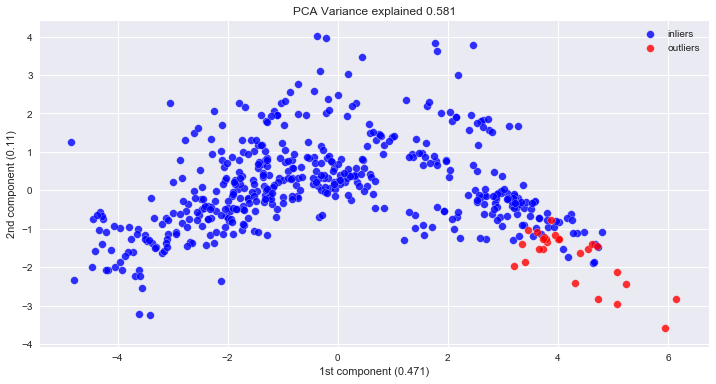

In [18]:
%matplotlib inline
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))

v1 = str(np.round(pca.explained_variance_ratio_[0],3))
v2 = str(np.round(pca.explained_variance_ratio_[1],3))


in_points = plt.scatter(principal_components[regular,0], principal_components[regular,1], 
                        c='blue', alpha=0.8, s=60, marker='o', edgecolors='white')

out_points = plt.scatter(principal_components[outliers,0], principal_components[outliers,1], 
                        c='red', alpha=0.8, s=60, marker='o', edgecolors='white')



plt.legend((in_points,out_points),('inliers','outliers'),scatterpoints=1, loc='best')

plt.xlabel('1st component ('+v1+')')
plt.ylabel('2nd component ('+v2+')')

vtot = 'PCA Variance explained ' + str(round(np.sum(pca.explained_variance_ratio_),3))
plt.title(vtot)

## OneClass SVM

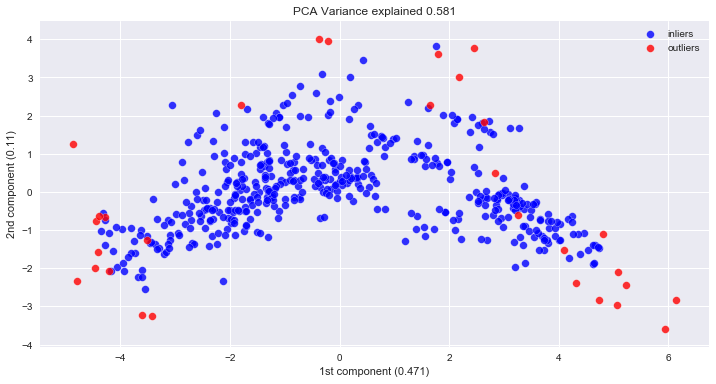

In [19]:
from sklearn.svm import OneClassSVM
from sklearn.decomposition import PCA

sns.set_style('darkgrid')
plt.figure(figsize=(12,6))

pca5 = PCA(5)
pComponents = pca5.fit_transform(df_normalized)

vtot = 'PCA Variance explained ' + str(round(np.sum(pca.explained_variance_ratio_),3))

outlier_fraction=0.01
nu_estimate = 0.95*outlier_fraction + 0.05

oneClassSVM = OneClassSVM(kernel='rbf', degree=3, gamma=1/len(df_normalized), nu = nu_estimate)

oneClassSVM.fit(df_normalized)
detection = oneClassSVM.predict(df_normalized)

outliers = np.where(detection==-1)
inliers = np.where(detection==1)

#for r in range(1,5):
    
in_points = plt.scatter(pComponents[inliers,0], pComponents[inliers,1],
                        c='blue', s=60, alpha=0.8, marker='o', edgecolors='white')

out_points = plt.scatter(pComponents[outliers,0], pComponents[outliers,1],
                        c='red', s=60, alpha=0.8, marker='o', edgecolors='white')

plt.legend((in_points,out_points), ('inliers','outliers'), loc='best')

plt.xlabel('1st component ('+v1+')')
plt.ylabel('2nd component ('+v2+')')

plt.title(vtot)
    
    

TypeError: 'module' object is not callable